# 第三题：使用sklearn的AgglomerativeClustering完成层次聚类

实验内容：
1. 使用sklearn的AgglomerativeClustering完成两个数据集的层次聚类
2. 计算外部指标FMI和NMI
3. 对6种形式的聚类效果可视化

# 1. 导入模块

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. 生成数据集

In [2]:
from sklearn import datasets
X1, y1 = datasets.make_circles(n_samples = 1500, factor = 0.5, noise = 0.05, random_state = 32)
X2, y2 = datasets.make_moons(n_samples = 1500, noise = 0.05, random_state = 32)

In [3]:
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

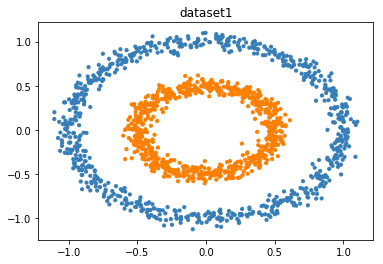

In [4]:
plt.title('dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = colors[y1])

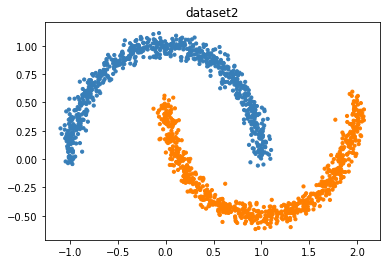

In [5]:
plt.title('dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = colors[y2])

# 3. 导入模型

In [6]:
from sklearn.cluster import AgglomerativeClustering

# 4. 聚类

层次聚类的`linkage`参数表示我们要用哪种距离（最小、最大、平均）进行聚类。这里我们选择`single`，表示最小距离。`complete`表示最大距离，`average`表示平均距离。

In [7]:
model = AgglomerativeClustering(n_clusters = 2, linkage="single")
model.fit(X1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2,
            pooling_func='deprecated')

对于层次聚类算法，我们可以使用`labels_`属性获得聚类结果

# 5. 聚类效果可视化

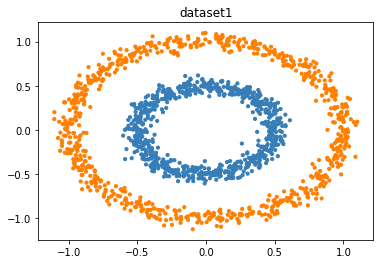

In [8]:
pred = model.labels_
plt.title('dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, color = colors[pred])

# Test

请你完成"single"，"complete"和"average"三种距离在两个数据集上的聚类任务，并绘制出聚类结果，计算6种情况的FMI和NMI

###### 双击此处填写

## 1. 数据集1

距离度量方式|FMI|NMI
-|-|-
single|1.0|1.0
complete|0.50922914758|0.00334915795828
average|0.503959314585|0.0031237686344

## 2. 数据集2

距离度量方式|FMI|NMI
-|-|-
single|1.0|1.0
complete|0.675584452163|0.276857924498
average|0.766050559316|0.526348991467

In [9]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score

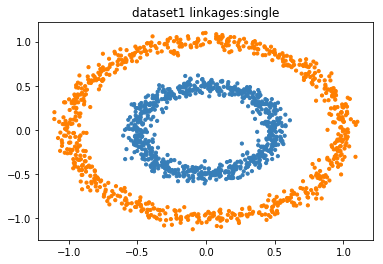

single 1.0 1.0


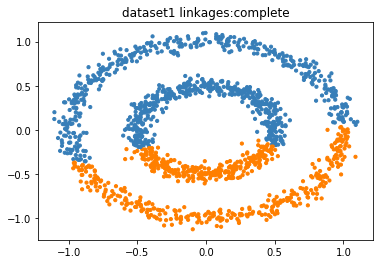

complete 0.50922914758 0.00334915795828


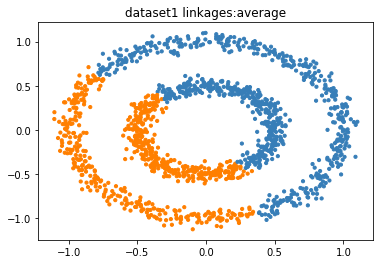

average 0.503959314585 0.0031237686344


In [14]:
# YOUR CODE HERE
# 数据集1
linkages = ['single', 'complete', 'average']
for l in linkages:
    model = AgglomerativeClustering(n_clusters = 2, linkage=l)
    model.fit(X1)
    pred = model.labels_
    
    plt.title('dataset1 linkages:' + l)
    plt.scatter(X1[:, 0], X1[:, 1], s = 10, color = colors[pred])
    plt.show()
    
    f = fowlkes_mallows_score(y1, pred)
    n = normalized_mutual_info_score(y1, pred)
    print(l, f , n)

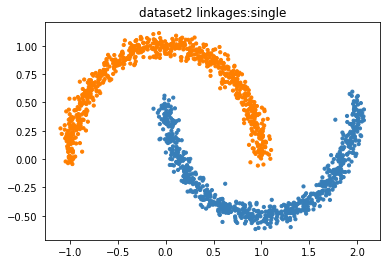

single 1.0 1.0


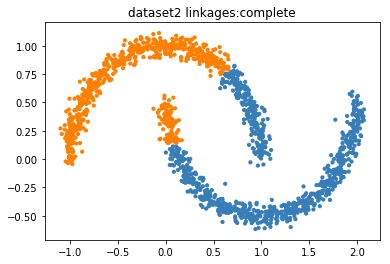

complete 0.675584452163 0.276857924498


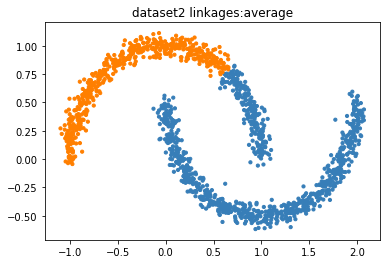

average 0.766050559316 0.526348991467


In [15]:
# YOUR CODE HERE
# 数据集2
linkages = ['single', 'complete', 'average']
for l in linkages:
    model = AgglomerativeClustering(n_clusters = 2, linkage=l)
    model.fit(X2)
    pred = model.labels_
    
    plt.title('dataset2 linkages:'+ l)
    plt.scatter(X2[:, 0], X2[:, 1], s = 10, color = colors[pred])
    plt.show()
    
    f = fowlkes_mallows_score(y2, pred)
    n = normalized_mutual_info_score(y2, pred)
    print(l, f , n)